In [9]:
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')


path = '/content/drive/My Drive/Social_Network_Ads (1).csv'

df=pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
#df.isna().sum()
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
#

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [14]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8625


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[46  6]
 [ 5 23]]


<Axes: >

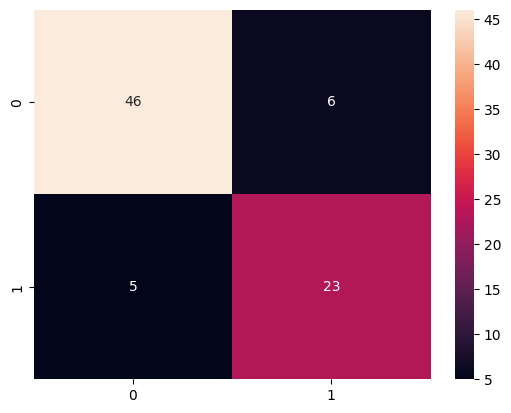

In [16]:
import seaborn as sns
sns.heatmap(cm,annot=True)

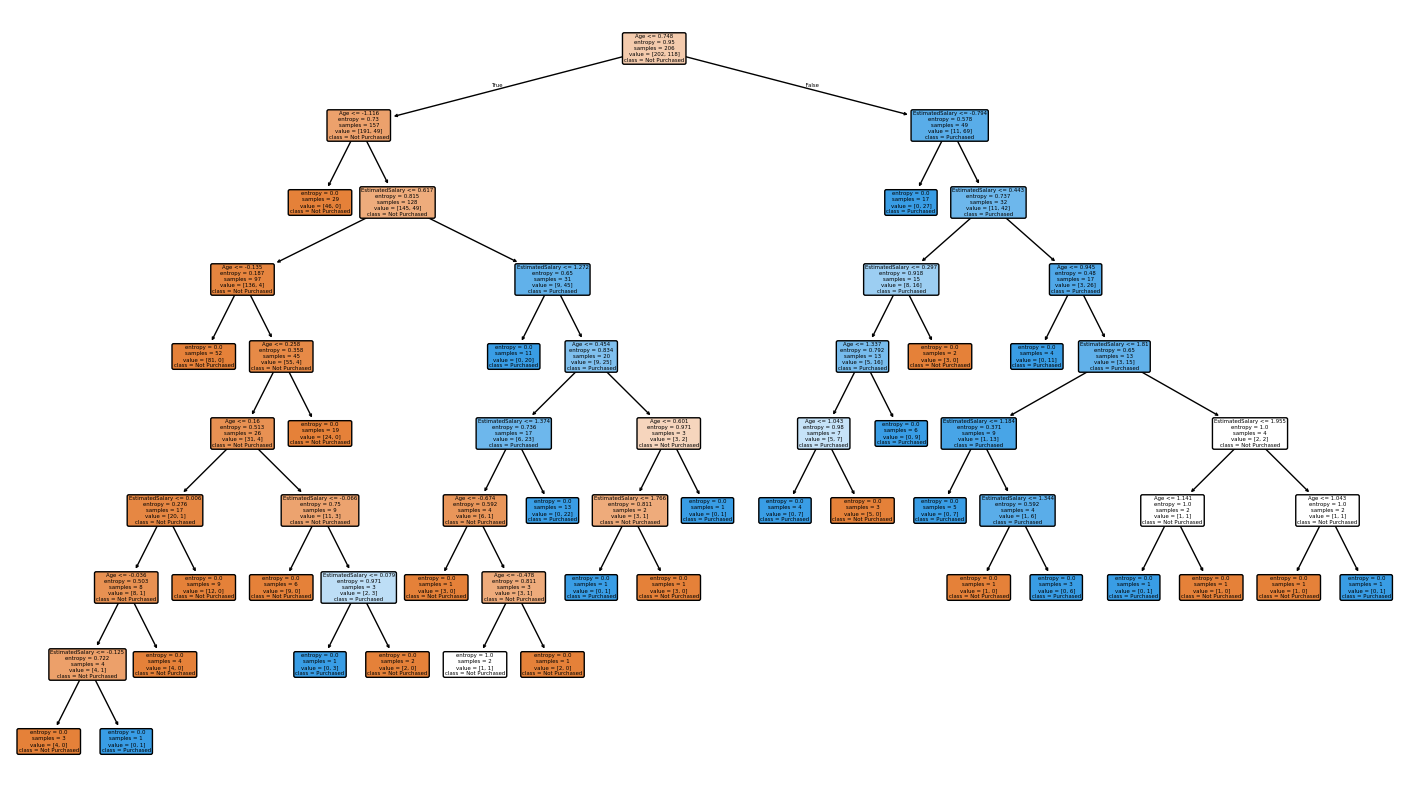

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree = classifier.estimators_[0] # first tree
plt.figure(figsize=(18, 10))
plot_tree(
    single_tree,
    feature_names=["Age", "EstimatedSalary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)
plt.show()